In [1]:
import random
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
elements = [' ', #пустое простарнство
            '@', #игрок
            '.', #пол
            '#', #стена
            'x', #выход с уровня
            '%', #ломающаяся стена
           ]

In [3]:
arr = []

with open("../floors/first_floor.txt", "w") as file:
    for __ in range(1024//16):
        arr_line = []
        for _ in range(1024//16):
            ind = random.randint(0, elements.__len__() - 1)
            arr_line += elements[ind]
        arr += arr_line
        print(*arr_line, file=file, sep = '')

In [4]:
from generate_maze import create_maze


In [5]:
def show(img):
    fig = plt.imshow(img, 'gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    #plt.savefig('maze2.png')
    plt.show()

59 59


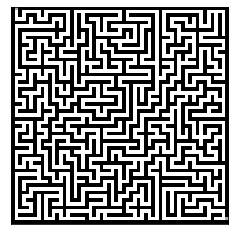

In [6]:
lago = create_maze(29, 29)
img = lago.return_img(padding=1)
show(img)

In [7]:
converter = {
    0: '#',
    255: '.',
    170: 'x',
    177: '@',
    100: '%',
}
walls = [0, 100]
weights = [0.8, 0.2]
#random.choices(walls, weights)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 0 and i % (img.shape[0] - 1) != 0 and j % (img.shape[1] - 1) != 0:
            img[i, j] = random.choices(walls, weights)[0]
            

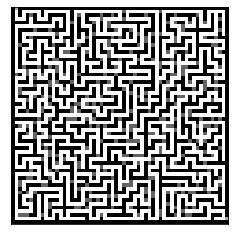

In [8]:
show(img)

In [9]:
with open("../floors/first_floor.txt", "w") as file:
    pict = img.copy()
    for i in range(pict.shape[0]):
        arr_line = []
        for j in range(pict.shape[1]):
            try:
                arr_line.append(converter[pict[i, j]])
            except:
                print(pict[i, j])

        print(*arr_line, file=file, sep = '')
                